<a href="https://colab.research.google.com/github/Nram94/simulacion-modelacion-python/blob/main/Semana06_AplicacionesI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Escenario Industrial: Simulación de la Concentración de Surfactante

## Contexto

Se está alimentando una solución concentrada de **surfactante 'A'** a un tanque agitado que inicialmente contiene agua.

* El proceso es **batch con adición** ($\dot{V}_{out} = 0$).
* La variable clave a modelar es la **concentración de surfactante en el tanque** ($C_A$).

---

# Datos del Proceso

| Parámetro | Símbolo | Valor | Unidad |
| :--- | :--- | :--- | :--- |
| Volumen Inicial de Agua | $$V_0$$ | 1000 | L |
| Flujo de Adición | $$\dot{V}_{in}$$ | 5.0 | L/min |
| Concentración de Entrada | $$C_{A,in}$$ | 0.20 | kg/L |
| Concentración Final Objetivo | $$C_{A,final}$$ | 0.045 | kg/L |

---


# 📈 Modelo Constitutivo Empírico (Reología)

---

## **Relación Viscosidad-Concentración**

Este modelo empírico describe cómo la **viscosidad** ($\mu$) de la solución varía en función de la **concentración de surfactante** ($C_A$).

El modelo es una función exponencial:

$$\mu(C_A) = 5.361 \cdot e^{(105.828 \cdot C_A)} - 1.196$$

Donde:
* $\mu$ es la **viscosidad** ( $Pa \cdot s$).
* $C_A$es la **concentración de surfactante 'A'** (en $kg/L$).

---

# 🏅 Nivel 1: Modelo Simplificado Estático - Crecimiento Lineal

Este modelo es el **atajo algebraico** más simple. Ignora la dinámica transitoria y el cambio de volumen, asumiendo una **tasa de cambio constante** (crecimiento lineal) basada en el volumen inicial.

---

## Ecuación de Tasa de Cambio Simplificada

La tasa de cambio simplificada se expresa como:

$$\frac{dC_A}{dt} \approx \frac{\dot{V}_{in} \cdot C_{A,in}}{V_0}$$

---

## Características del Modelo

| Característica | Detalle |
| :--- | :--- |
| **Rigor** | **Mínimo**. Modelo algebraico. |
| **Suposiciones Críticas** | $V$**Constante**. Se asume $\dot{V}_{in} C_{A,in} \approx \text{Acumulación}$, y $\text{Acumulación} \approx V_0 \frac{dC_A}{dt}$. |
| **Perfil $C_A(t)$** | **Lineal**. El resultado es $C_A(t) = C_A(0) + \left(\frac{dC_A}{dt}\right) \cdot t$. |
| **Uso Práctico** | **Estimación Rápida**. Proporciona el límite inferior del tiempo final. |

---

> 💡 **Interpretación física:** La tasa de concentración del tanque es constante porque el denominador ($V_0$) no cambia. Esto es una estimación optimista del proceso.

---

# 🌊 Nivel 2: EDO de Balance de Materia Dinámico - Mezclado Perfecto

Este es el **modelo riguroso estándar**. Aplica la **Conservación de la Masa** para obtener una EDO de primer orden. Su única simplificación es asumir **Mezclado Perfecto** (concentración uniforme en el espacio).

---

## Ecuación de Tasa de Cambio (EDO)

$$\frac{dC_A}{dt} = \frac{\dot{V}_{in} \cdot C_{A,in} - C_A \cdot \dot{V}_{in}}{V_0 + \dot{V}_{in} \cdot t}$$

---

## Características del Modelo

| Característica | Detalle |
| :--- | :--- |
| **Rigor** | **Estándar (Fenomenológico)**. |
| **Suposiciones Críticas** | **Mezclado Perfecto**. $\tau_{mix} \ll \tau_{proceso}$. |
| **Perfil $C_A(t)$** | **No Lineal**. La tasa $\frac{dC_A}{dt}$disminuye a medida que el volumen$$V(t)$ crece. |
| **Uso Práctico** | **Modelo Base de Control**. Predice el perfil $C_A(t)$ con alta precisión bajo condiciones de buen mezclado. |

---

> 💡 **Interpretación física:** El modelo predice que la adición se diluye cada vez más, ya que el volumen total de la piscina aumenta.

---


# 🏆 Nivel 3: EDO Acoplada de Dos Compartimentos - Mezclado No Ideal

Este modelo incrementa el rigor eliminando la suposición de Mezclado Perfecto (Nivel 2) sin recurrir a una EDP. Se utiliza un **Modelo de Compartimentos (Two-Tank Model)** donde el tanque se divide conceptualmente en dos volúmenes conectados por una **tasa de circulación** ($$Q_c$$).

La rigurosidad se introduce al acoplar la **Viscosidad** ($\mu$) al flujo de intercambio ($$Q_c$$): si $\mu$ sube, el mezclado empeora y $Q_c$ cae.

---

## Ecuaciones Constitutivas y de Tasa de Cambio (Sistema de EDOs)

### **1. Viscosidad Dinámica (Constitutiva):** La concentración promedio $\overline{C_A}(t)$ determina la viscosidad.

$$\mu(t) = 5.361 \cdot e^{(105.828 \cdot \overline{C_A}(t))} - 1.196$$

### **2. Tasa de Circulación (Correlación Empírica):** El flujo de intercambio $Q_c$ es inverso al tiempo de mezcla $\tau_{mix}$, que depende fuertemente de $\mu$.

$$Q_c(t) \approx \frac{V(t)}{\tau_{mix}(\mu)} \quad \text{donde} \quad \tau_{mix} \propto \frac{1}{N_{Re}} \propto \mu$$

*(Ejemplo de relación simplificada: $Q_c = \frac{k_0}{\mu(t)}$)*

### **3. EDOs Acopladas de Concentración:** Se modelan dos concentraciones, $C_{A1}$ (cerca de la entrada) y $C_{A2}$ (el bulk):

* **Compartimento 1 (Inlet):** $$V_1 \frac{dC_{A1}}{dt} = \dot{V}_{in} C_{A,in} + Q_c(t) (C_{A2} - C_{A1})$$
* **Compartimento 2 (Bulk):** $$V_2 \frac{dC_{A2}}{dt} = Q_c(t) (C_{A1} - C_{A2})$$
* **Variable Final:** $$\overline{C_A}(t) = \frac{C_{A1}V_1 + C_{A2}V_2}{V_0 + \dot{V}_{in} t}$$

---

## Características del Modelo

| Característica | Detalle |
| :--- | :--- |
| **Rigor** | **Máximo** (Sistema de EDOs acopladas). Introduce el transporte no ideal. |
| **Conexión Clave** | $C_A \to \mu \to Q_c \to \text{Perfil de } C_A$. La EDO acopla el Balance de Masa con la Correlación Empírica de Mezclado. |
| **Resultado** | $C_{A2}(t)$(Concentración de Producto) alcanzará $C_{A,final}$ **más tarde** que la predicción del Nivel 2. |
| **Uso Práctico** | **Simulación de Calidad y Escenario**. Revela si la alta viscosidad al final del lote provoca que el producto final no sea uniforme o si la adición debe ser más lenta. |

---

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129353 (\N{THIRD PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


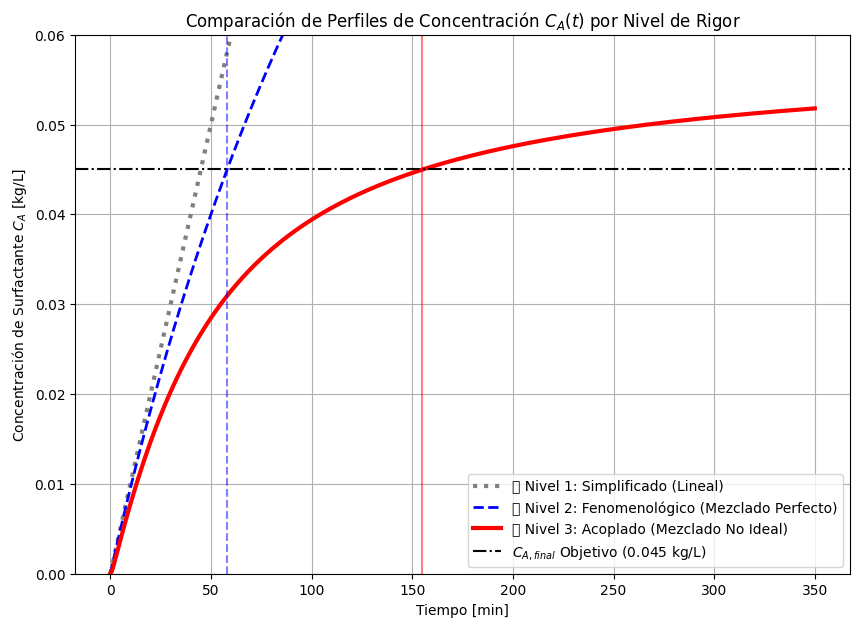


--- TIEMPO REQUERIDO PARA ALCANZAR CA=0.045 kg/L ---
🥉 Nivel 1 (Estático): 45.00 min (Error Alto)
🥈 Nivel 2 (Mezclado Perfecto): 58.22 min
🥇 Nivel 3 (Mezclado No Ideal): 155.01 min
------------------------------------------------------------
El Nivel 3 (riguroso) predice un tiempo final mayor debido al efecto de la alta viscosidad en la eficiencia de la mezcla ($Q_c$).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# =============================================================================
# 0. PARÁMETROS GLOBALES Y CONSTANTES
# =============================================================================
V0 = 1000.0         # Volumen inicial [L]
V_in = 5.0          # Flujo de entrada [L/min]
CA_in = 0.20        # Concentración de surfactante en la entrada [kg/L]
CA_final_obj = 0.045 # Concentración final objetivo [kg/L]

# Parámetros del Modelo Constitutivo de Viscosidad (μ = a * exp(b * CA) + c)
a_fit = 5.361
b_fit = 105.828
c_fit = -1.196

# =============================================================================
# 1. NIVEL 1: MODELO SIMPLIFICADO ESTÁTICO (CRECIMIENTO LINEAL)
# =============================================================================

def model_nivel1(t, V0, V_in, CA_in):
    """
    Crecimiento Lineal. Asume V ≈ V0.
    dCA/dt ≈ (V_in * CA_in) / V0
    """
    dCA_dt_const = (V_in * CA_in) / V0
    return dCA_dt_const * t

# =============================================================================
# 2. NIVEL 2: EDO DINÁMICO (MEZCLADO PERFECTO)
# =============================================================================

def dCA_dt_nivel2(CA, t, V0, V_in, CA_in):
    """
    EDO de Balance de Materia Dinámico.
    Asume Mezclado Perfecto (C_A uniforme).
    """
    V_t = V0 + V_in * t
    # dCA/dt = (V_in * CA_in - V_in * CA) / V(t)
    return (V_in * CA_in - V_in * CA) / V_t

# =============================================================================
# 3. NIVEL 3: EDO ACOPLADA DE DOS COMPARTIMENTOS (MEZCLADO NO IDEAL)
# =============================================================================

# Definición del Modelo Constitutivo (Acoplamiento)
def mu_fit(CA):
    """Modelo de Viscosidad: μ(CA)"""
    return a_fit * np.exp(b_fit * CA) + c_fit

# Parámetros y Correlación para el Nivel 3
V1_frac = 0.20 # Fracción del volumen asignado al Compartimento 1 (zona de inyección)
# Asumimos una correlación simplificada: Qc = kQ / μ
mu_ref = mu_fit(0.0) # Viscosidad a CA=0 ≈ 4.165 mPa·s
Qc_ref = 200.0 # Flujo de circulación de referencia (alto) en baja viscosidad [L/min]
kQ = Qc_ref * mu_ref # Constante de proporcionalidad

def dCA_dt_nivel3(C, t, V0, V_in, CA_in):
    """
    Sistema de 2 EDOs acopladas (Compartimentos).
    C[0] = CA1 (Compartimento de inyección), C[1] = CA2 (Compartimento bulk).
    """
    CA1, CA2 = C
    V_t = V0 + V_in * t

    # Concentración Promedio para calcular la Viscosidad:
    # Asumimos que la viscosidad del bulk (CA2) domina
    mu_t = mu_fit(CA2)

    # Flujo de Circulación (Qc) afectado por la Viscosidad:
    Qc_t = kQ / mu_t

    V1_t = V1_frac * V_t
    V2_t = (1 - V1_frac) * V_t

    # La EDO del volumen debe ser corregida ya que V1 y V2 crecen con el tiempo:
    # d(V*C)/dt = V dC/dt + C dV/dt => dC/dt = (Flujos/V) - C/V * dV/dt

    # Flujo de Volumen al Compartimento 1: dV1/dt = V_in * V1_frac
    dV1_dt = V_in * V1_frac
    # Flujo de Volumen al Compartimento 2: dV2/dt = V_in * (1 - V1_frac)

    # EDO para CA1 (Compartimento 1: Inyección)
    dCA1_dt = (V_in * CA_in + Qc_t * CA2 - (Qc_t + dV1_dt) * CA1) / V1_t

    # EDO para CA2 (Compartimento 2: Bulk/Producto)
    dCA2_dt = (Qc_t * CA1 - Qc_t * CA2) / V2_t - (CA2 / V2_t) * (V_in * (1 - V1_frac))

    return [dCA1_dt, dCA2_dt]

# =============================================================================
# 4. EJECUCIÓN DE LA SIMULACIÓN
# =============================================================================

# Rango de tiempo basado en la estimación del Nivel 2 (t_final ≈ 285 min)
t_sim_max = 350.0
t_sim = np.linspace(0, t_sim_max, 500)

# --- Nivel 1 ---
CA_sol_N1 = model_nivel1(t_sim, V0, V_in, CA_in)

# --- Nivel 2 ---
CA_initial_N2 = 0.0
CA_sol_N2 = odeint(dCA_dt_nivel2, CA_initial_N2, t_sim, args=(V0, V_in, CA_in)).flatten()

# --- Nivel 3 ---
C_initial_N3 = [0.0, 0.0] # [CA1_0, CA2_0]
C_sol_N3 = odeint(dCA_dt_nivel3, C_initial_N3, t_sim, args=(V0, V_in, CA_in))
# Tomamos la concentración del Compartimento 2 (CA2) como el resultado del producto
CA_sol_N3 = C_sol_N3[:, 1]

# =============================================================================
# 5. GRÁFICA COMPARATIVA
# =============================================================================

plt.figure(figsize=(10, 7))

plt.plot(t_sim, CA_sol_N1, label='🥉 Nivel 1: Simplificado (Lineal)', linestyle=':', color='gray', linewidth=3)
plt.plot(t_sim, CA_sol_N2, label='🥈 Nivel 2: Fenomenológico (Mezclado Perfecto)', linestyle='--', color='blue', linewidth=2)
plt.plot(t_sim, CA_sol_N3, label='🥇 Nivel 3: Acoplado (Mezclado No Ideal)', linestyle='-', color='red', linewidth=3)

# Referencias
plt.axhline(CA_final_obj, color='black', linestyle='-.', label=f'$C_{{A,final}}$ Objetivo ({CA_final_obj} kg/L)')

# Mostrar el tiempo requerido (interpolado para el Nivel 2 como referencia)
t_final_N2 = t_sim[np.argmin(np.abs(CA_sol_N2 - CA_final_obj))]
plt.axvline(t_final_N2, color='blue', linestyle='--', alpha=0.5)

# Mostrar el tiempo requerido (interpolado para el Nivel 3)
t_final_N3 = t_sim[np.argmin(np.abs(CA_sol_N3 - CA_final_obj))]
plt.axvline(t_final_N3, color='red', linestyle='-', alpha=0.5)

plt.title('Comparación de Perfiles de Concentración $C_A(t)$ por Nivel de Rigor')
plt.xlabel("Tiempo [min]")
plt.ylabel("Concentración de Surfactante $C_A$ [kg/L]")
plt.legend()
plt.grid(True)
plt.ylim(0, 0.06)
plt.show()

# =============================================================================
# 6. RESULTADOS CLAVE
# =============================================================================

print("\n--- TIEMPO REQUERIDO PARA ALCANZAR CA=0.045 kg/L ---")

# Nivel 1 (Fórmula inversa del dCA/dt):
t_final_N1 = (CA_final_obj * V0) / (V_in * CA_in)
print(f"🥉 Nivel 1 (Estático): {t_final_N1:.2f} min (Error Alto)")

# Nivel 2 (Búsqueda en la solución EDO):
print(f"🥈 Nivel 2 (Mezclado Perfecto): {t_final_N2:.2f} min")

# Nivel 3 (Búsqueda en la solución EDO acoplada):
print(f"🥇 Nivel 3 (Mezclado No Ideal): {t_final_N3:.2f} min")
print("-" * 60)
print("El Nivel 3 (riguroso) predice un tiempo final mayor debido al efecto de la alta viscosidad en la eficiencia de la mezcla ($Q_c$).")

# 🧪 Ejercicio: Control Dinámico de Viscosidad por Adición de Surfactante

### **Escenario Industrial (Contexto)**

Usted está a cargo de un reactor *batch* donde se prepara la fase acuosa de una emulsión.  
La **viscosidad final** del producto es crítica, y se controla mediante la adición de un **surfactante espesante**.  
El surfactante se alimenta en solución a una **velocidad constante**.

El objetivo es simular el **perfil de concentración del surfactante** y predecir el **perfil de viscosidad**  
resultante a lo largo del tiempo de adición, utilizando un **modelo de regresión** para la reología.


## I. Datos y Modelos Base

### A. Datos del Equipo y Proceso (Balance Dinámico)

| **Parámetro** | **Símbolo** | **Valor** | **Unidad** |
|:---------------|:------------:|:----------:|:-----------:|
| Volumen Inicial de Agua | $V_0$ | 1000 | L |
| Concentración Inicial de Surfactante | $C_A(0)$ | 0.0 | kg/L |
| Flujo de Adición (Solución Surfactante) | $\dot{V}_{in}$ | 5 | L/min |
| Concentración del Surfactante en el Flujo de Entrada | $C_{A,in}$ | 0.20 | kg/L |
| **Supuesto** | Flujo de Salida ($\dot{V}_{out}$) | 0 | — |


### Modelo Fenomenológico (Balance de Materia Dinámico)

El balance de materia para el surfactante *A* en el tanque de volumen creciente $V(t)$ es:

$$
\frac{d(V \cdot C_A)}{dt} = \dot{V}_{in} \cdot C_{A,in} - \dot{V}_{out} \cdot C_A
$$

Dado que $V(t) = V_0 + \dot{V}_{in} \cdot t$ y $\dot{V}_{out} = 0$:

$$
\frac{d(V \cdot C_A)}{dt} = V \frac{dC_A}{dt} + C_A \frac{dV}{dt} = \dot{V}_{in} \cdot C_{A,in}
$$

Reordenando (con $\frac{dV}{dt} = \dot{V}_{in}$):

$$
\frac{dC_A}{dt} = \frac{\dot{V}_{in} \cdot C_{A,in} - C_A \cdot \dot{V}_{in}}{V_0 + \dot{V}_{in} \cdot t}
$$


### B. Datos Reológicos (Modelo Empírico)

El equipo de laboratorio proporcionó los siguientes datos de **viscosidad ($\mu$)** para diferentes concentraciones del **Surfactante 'A' ($C_A$)**:

| $C_A$ (Concentración de Surfactante) [kg/L] | $\mu$ (Viscosidad) [mPa·s] |
|:--------------------------------------------:|:---------------------------:|
| 0.00 | 1.0 |
| 0.01 | 50.0 |
| 0.02 | 150.0 |
| 0.03 | 350.0 |
| 0.04 | 600.0 |
| 0.05 | 1000.0 |

---

**🎯 Objetivo Empírico:**  
Modelar la relación **Viscosidad vs. Concentración** con un modelo de potencia simple o exponencial.  

Por ejemplo:

- Modelo exponencial:  
  $$
  \mu = a \cdot \exp(b \cdot C_A)
  $$

- Modelo de potencia:  
  $$
  \mu = a \cdot C_A^b + c
  $$


## II. Tareas para el Estudiante 🧑‍💻

## Tarea A: Cierre Empírico (Regresión) 📊

1.  **Selección del Modelo:** Elija el modelo de regresión (**Potencia o Exponencial**) que mejor se ajuste a los datos **no lineales de Viscosidad vs. Concentración**.

2.  **Cálculo de Parámetros:** Determine los parámetros $a$ y $b$ (o equivalentes) de su modelo de regresión.

---

## Tarea B: Simulación Dinámica (Concentración) 🧪

1.  **Integración de la EDO:** Utilice la Ecuación Diferencial Ordinaria (**EDO**) del Balance de Materia Dinámico para simular la **Concentración $C_A(t)$** a lo largo del tiempo.

2.  **Tiempo de Proceso:** Simule durante el tiempo necesario para alcanzar una concentración final objetivo de $C_{A,final} = 0.045 \text{ kg/L}$.

---

## Tarea C: Acoplamiento Híbrido (Viscosidad Dinámica) 🔗

1.  **Acoplamiento:** Utilice el perfil de $C_A(t)$ (el resultado de la Tarea B) como la variable de entrada para su modelo empírico de viscosidad (el resultado de la Tarea A).

2.  **Predicción:** Calcule y grafique el **Perfil de Viscosidad $\mu(t)$** a lo largo del tiempo de adición.


--- TAREA A: PARÁMETROS POR LINEALIZACIÓN (np.polyfit) ---
Modelo Linealizado: ln(mu) = 3.40 + 73.78 * CA
Parámetros [a, b]: [30.08, 73.78] (c=0 ignorado)
R2 = 0.9177398883655274
MAE = 0.17 %


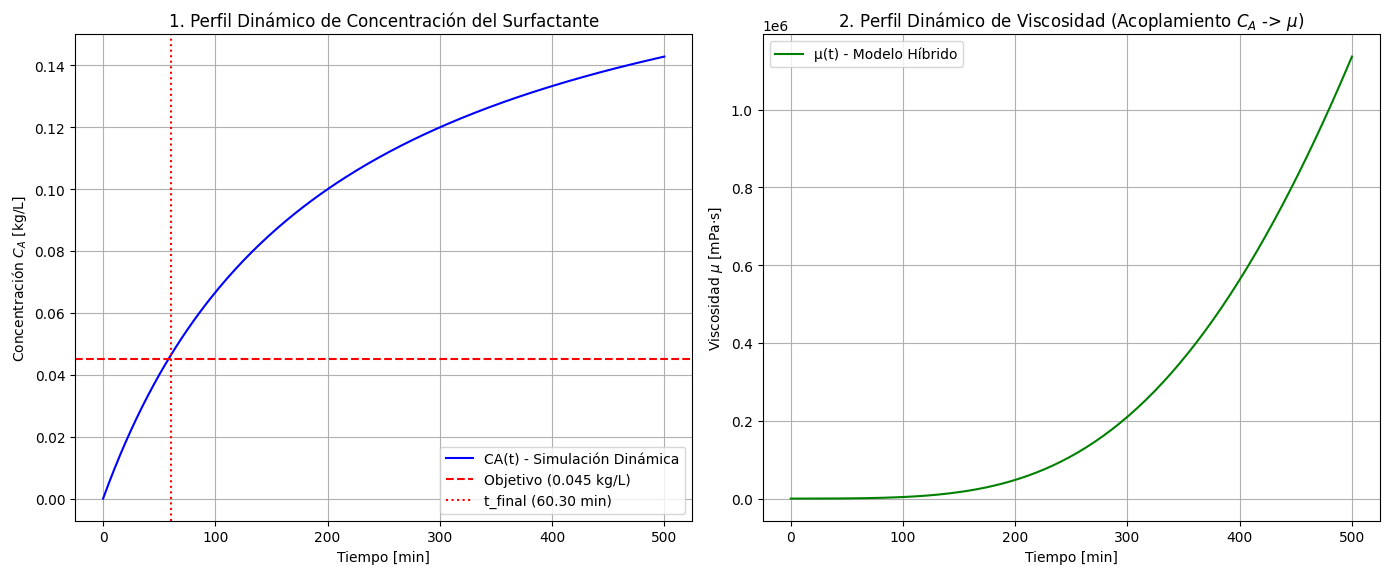

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# =============================================================================
# 0. DATOS DEL PROBLEMA
# =============================================================================
V0 = 1000.0         # Volumen inicial [L]
V_in = 5.0          # Flujo de entrada [L/min]
CA_in = 0.20        # Concentración de surfactante en la entrada [kg/L]
CA_final_obj = 0.045 # Concentración final objetivo [kg/L]

# Datos de la Tarea A (Regresión Empírica)
CA_data = np.array([0.00, 0.01, 0.02, 0.03, 0.04, 0.05]) # [kg/L]
mu_data = np.array([1.0, 50.0, 150.0, 350.0, 600.0, 1000.0]) # [mPa*s]
# =============================================================================
# I. TAREA A: MODELO EMPÍRICO (Regresión de Viscosidad)
# =============================================================================
# Usamos solo datos donde la concentración es > 0, para evitar ln(1) con c=0.
CA_linear = CA_data[1:]
mu_linear = mu_data[1:]

# 1. Transformación Logarítmica
X_prime = CA_linear      # X' = C_A
Y_prime = np.log(mu_linear) # Y' = ln(mu)

# 2. Regresión Lineal (Ajuste de Grado 1)
# np.polyfit retorna [pendiente (b), intercepción (ln(a))]
b_lin, ln_a_lin = np.polyfit(X_prime, Y_prime, 1)

# 3. Cálculo de los Parámetros
a_lin = np.exp(ln_a_lin)

# Métricas
Y_pred = a_lin * np.exp(CA_linear*b_lin)
r2 = r2_score(mu_linear, Y_pred)
MAPE = mean_absolute_percentage_error(mu_linear, Y_pred)
print("\n--- TAREA A: PARÁMETROS POR LINEALIZACIÓN (np.polyfit) ---")
print(f"Modelo Linealizado: ln(mu) = {ln_a_lin:.2f} + {b_lin:.2f} * CA")
print(f"Parámetros [a, b]: [{a_lin:.2f}, {b_lin:.2f}] (c=0 ignorado)")
print(f"R2 = {r2}")
print(f"MAE = {MAPE:.2f} %")

# =============================================================================
# II. TAREA B: MODELO FENOMENOLÓGICO DINÁMICO (Concentración)
# =============================================================================

def dCA_dt(CA, t, V0, V_in, CA_in):
    """
    EDO para la concentración de surfactante (Balance de Materia Dinámico)
    """
    # Volumen en el tiempo: V(t) = V0 + V_in * t
    V_t = V0 + V_in * t

    # EDO: dCA/dt = (V_in * CA_in - V_in * CA) / V(t)
    dCA_dt_val = (V_in * CA_in - V_in * CA) / V_t
    return dCA_dt_val

# Cálculo del tiempo total requerido (opcional, para definir el rango de simulación)
# Se puede integrar la EDO, o despejar el tiempo t_final
# Tarea: Calcular el tiempo final t_final_req para que CA(t) = CA_final_obj

# Para iniciar la simulación, asumiremos un tiempo:
t_sim_max = 500.0 # Minutos (para empezar)

# Integración (Simulación Dinámica)
t_sim = np.linspace(0, t_sim_max, 200)
CA_initial = 0.0 # C_A(0)

CA_sol = odeint(
    dCA_dt,
    CA_initial,
    t_sim,
    args=(V0, V_in, CA_in)
)

# Encontrar el tiempo t_final_req (OTRA FORMA)
# Busca el índice donde CA_sol es >= CA_final_obj
idx_final = np.argmax(CA_sol >= CA_final_obj)
if idx_final == 0 and CA_sol[0] < CA_final_obj:
    print("Advertencia: El tiempo de simulación inicial fue muy corto.")
    t_final_req = t_sim_max # Usar el máximo simulado
else:
    t_final_req = t_sim[idx_final]


# =============================================================================
# III. TAREA C: ACOPLAMIENTO HÍBRIDO (Viscosidad Dinámica)
# =============================================================================
# Definición del modelo exponencial: mu = a * exp(b * CA) + c
def model_viscosidad_exp(CA, a, b, c):
    """Modelo Empírico: Viscosidad (mu) vs Concentración (CA)"""
    return a * np.exp(b * CA) + c

c_lin = 0.0

mu_t = model_viscosidad_exp(CA_sol, a_lin, b_lin, c_lin) # Tarea del estudiante

# =============================================================================
# IV. VISUALIZACIÓN
# =============================================================================

plt.figure(figsize=(14, 6))

# Gráfico 1: Concentración Dinámica
plt.subplot(1, 2, 1)
plt.plot(t_sim, CA_sol, label='CA(t) - Simulación Dinámica', color='blue')
plt.axhline(CA_final_obj, color='red', linestyle='--', label=f'Objetivo ({CA_final_obj} kg/L)')
plt.axvline(t_final_req, color='red', linestyle=':', label=f't_final ({t_final_req:.2f} min)')
plt.title('1. Perfil Dinámico de Concentración del Surfactante')
plt.xlabel("Tiempo [min]")
plt.ylabel("Concentración $C_A$ [kg/L]")
plt.grid(True)
plt.legend()

# Gráfico 2: Viscosidad Dinámica (Acoplamiento Híbrido)
plt.subplot(1, 2, 2)
plt.plot(t_sim, mu_t, label='μ(t) - Modelo Híbrido', color='green')
plt.title(r'2. Perfil Dinámico de Viscosidad (Acoplamiento $C_A$ -> $\mu$)')
plt.xlabel("Tiempo [min]")
plt.ylabel(r"Viscosidad $\mu$ [mPa·s]")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()